In [12]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
%matplotlib inline

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [13]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

X.shape

(1288L, 1850L)

In [14]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target

In [15]:
n_features = X.shape[1]

X.shape

(1288L, 1850L)

'Hugo Chavez'

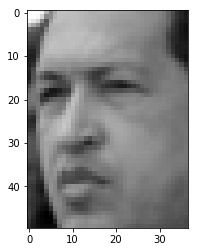

In [16]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)

lfw_people.target_names[y[0]]

'George W Bush'

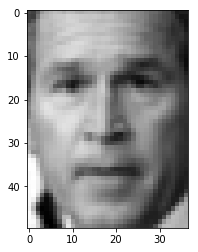

In [17]:
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [18]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time # for timing our work

# split into a training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# get our training and test set

t0 = time() # get the time now
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# Predicting people's names on the test set
y_pred = logreg.predict(X_test)

print accuracy_score(y_pred, y_test), "Accuracy"
print (time() - t0), "seconds"

0.810559006211 Accuracy
8.84000015259 seconds


In [27]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 75

from sklearn import decomposition

# Extracting the top %d eigenfaces from %d faces % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

# This whiten parameter speeds up the computation of our extracted columns
# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
t0 = time()

# Predicting people's names on the test set WITH PCA
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy"
print (time() - t0), "seconds"

0.816770186335 Accuracy
0.148000001907 seconds


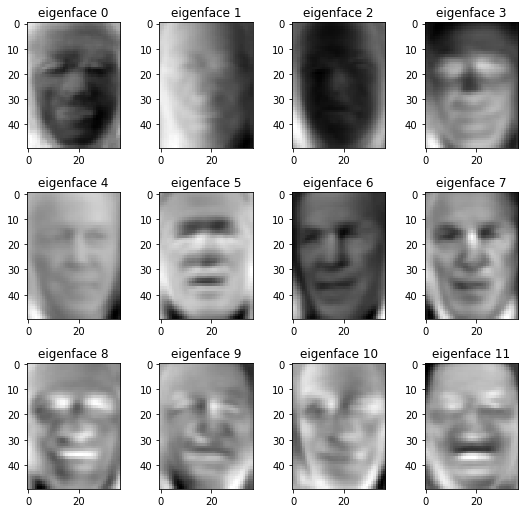

In [29]:
def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)

        # plot the gallery of the most significative eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles)
plt.show()